<a href="https://colab.research.google.com/github/mortonsguide/axis-model-suite/blob/main/Hubble_Tension_Hz_frame_5_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best-Fit Model Comparison on H(z) Data:
------------------------------------------------------------
Model                      χ²     χ²/dof        AIC        BIC
ΛCDM                    16.22      0.541      20.22      23.15
Axis Model (β)          15.36      0.530      21.36      25.76
------------------------------------------------------------
Best-fit ΛCDM params:     H₀ = 70.76, Ωₘ = 0.253
Best-fit Axis Model β:    H₀ = 66.40, Ωₘ = 0.262, β = 0.250


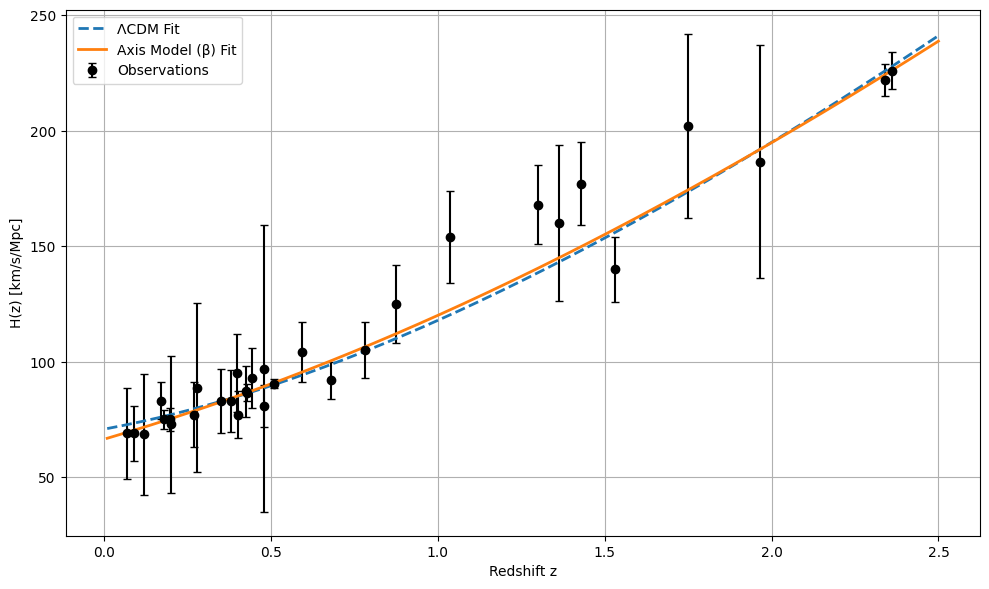

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# --- Step 1: Observational Data (32-point chronometer set) ---
Hz_data = np.array([
    [0.07, 69.0, 19.6], [0.09, 69.0, 12.0], [0.12, 68.6, 26.2], [0.17, 83.0, 8.0],
    [0.179, 75.0, 4.0], [0.199, 75.0, 5.0], [0.20, 72.9, 29.6], [0.27, 77.0, 14.0],
    [0.28, 88.8, 36.6], [0.352, 83.0, 14.0], [0.3802, 83.0, 13.5], [0.4, 95.0, 17.0],
    [0.4004, 77.0, 10.2], [0.4247, 87.1, 11.2], [0.43, 86.45, 3.68], [0.44497, 92.8, 12.9],
    [0.4783, 80.9, 9.0], [0.48, 97.0, 62.0], [0.510, 90.4, 1.9], [0.593, 104.0, 13.0],
    [0.68, 92.0, 8.0], [0.781, 105.0, 12.0], [0.875, 125.0, 17.0], [1.037, 154.0, 20.0],
    [1.3, 168.0, 17.0], [1.363, 160.0, 33.6], [1.43, 177.0, 18.0], [1.53, 140.0, 14.0],
    [1.75, 202.0, 40.0], [1.965, 186.5, 50.4], [2.34, 222.0, 7.0], [2.36, 226.0, 8.0]
])
z_obs, Hz_obs, Hz_err = Hz_data[:, 0], Hz_data[:, 1], Hz_data[:, 2]

# --- Step 2: Model Definitions ---
def H_axis_beta(z, H0, Om, beta):
    n_val = 6 * beta / (beta + 2)
    return H0 * np.sqrt(Om * (1 + z)**3 + (1 - Om) * (1 + z)**n_val)

def H_lcdm(z, H0, Om):
    return H0 * np.sqrt(Om * (1 + z)**3 + (1 - Om))

# --- Step 3: Objective Function ---
def chi2_objective(params, model_func, z, y, y_err):
    model_y = model_func(z, *params)
    return np.sum(((y - model_y) / y_err)**2)

# --- Step 4: Parameter Fit ---
bounds_lcdm = [(60, 80), (0.0, 1.0)]
bounds_axis = [(60, 80), (0.0, 1.0), (0.0, 1.0)]

initial_guess_lcdm = [70, 0.3]
result_lcdm = minimize(chi2_objective, initial_guess_lcdm, args=(H_lcdm, z_obs, Hz_obs, Hz_err), bounds=bounds_lcdm)
H0_lcdm_fit, Om_lcdm_fit = result_lcdm.x
chi2_lcdm_fit = result_lcdm.fun
k_lcdm = len(initial_guess_lcdm)

initial_guess_axis = [68, 0.3, 0.5]
result_axis = minimize(chi2_objective, initial_guess_axis, args=(H_axis_beta, z_obs, Hz_obs, Hz_err), bounds=bounds_axis)
H0_axis_fit, Om_axis_fit, beta_axis_fit = result_axis.x
chi2_axis_fit = result_axis.fun
k_axis = len(initial_guess_axis)

# --- Step 5: Statistics ---
n_data = len(z_obs)
def aic(chi2, k): return chi2 + 2 * k
def bic(chi2, k, n): return chi2 + k * np.log(n)

print("Best-Fit Model Comparison on H(z) Data:")
print("-" * 60)
print(f"{'Model':<20} {'χ²':>8} {'χ²/dof':>10} {'AIC':>10} {'BIC':>10}")
print(f"{'ΛCDM':<20} {chi2_lcdm_fit:8.2f} {chi2_lcdm_fit/(n_data-k_lcdm):10.3f} {aic(chi2_lcdm_fit, k_lcdm):10.2f} {bic(chi2_lcdm_fit, k_lcdm, n_data):10.2f}")
print(f"{'Axis Model (β)':<20} {chi2_axis_fit:8.2f} {chi2_axis_fit/(n_data-k_axis):10.3f} {aic(chi2_axis_fit, k_axis):10.2f} {bic(chi2_axis_fit, k_axis, n_data):10.2f}")
print("-" * 60)
print(f"Best-fit ΛCDM params:     H₀ = {H0_lcdm_fit:.2f}, Ωₘ = {Om_lcdm_fit:.3f}")
print(f"Best-fit Axis Model β:    H₀ = {H0_axis_fit:.2f}, Ωₘ = {Om_axis_fit:.3f}, β = {beta_axis_fit:.3f}")

# --- Step 6: Plot ---
z_fit = np.linspace(0.01, 2.5, 300)
Hz_lcdm_fit = H_lcdm(z_fit, H0_lcdm_fit, Om_lcdm_fit)
Hz_axis_fit = H_axis_beta(z_fit, H0_axis_fit, Om_axis_fit, beta_axis_fit)

plt.figure(figsize=(10, 6))
plt.errorbar(z_obs, Hz_obs, yerr=Hz_err, fmt='o', label='Observations', color='black', capsize=3)
plt.plot(z_fit, Hz_lcdm_fit, label='ΛCDM Fit', linestyle='--', linewidth=2)
plt.plot(z_fit, Hz_axis_fit, label='Axis Model (β) Fit', linestyle='-', linewidth=2)
plt.xlabel("Redshift z")
plt.ylabel("H(z) [km/s/Mpc]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Hz_model_comparison.png", dpi=300, bbox_inches='tight')
plt.show()
